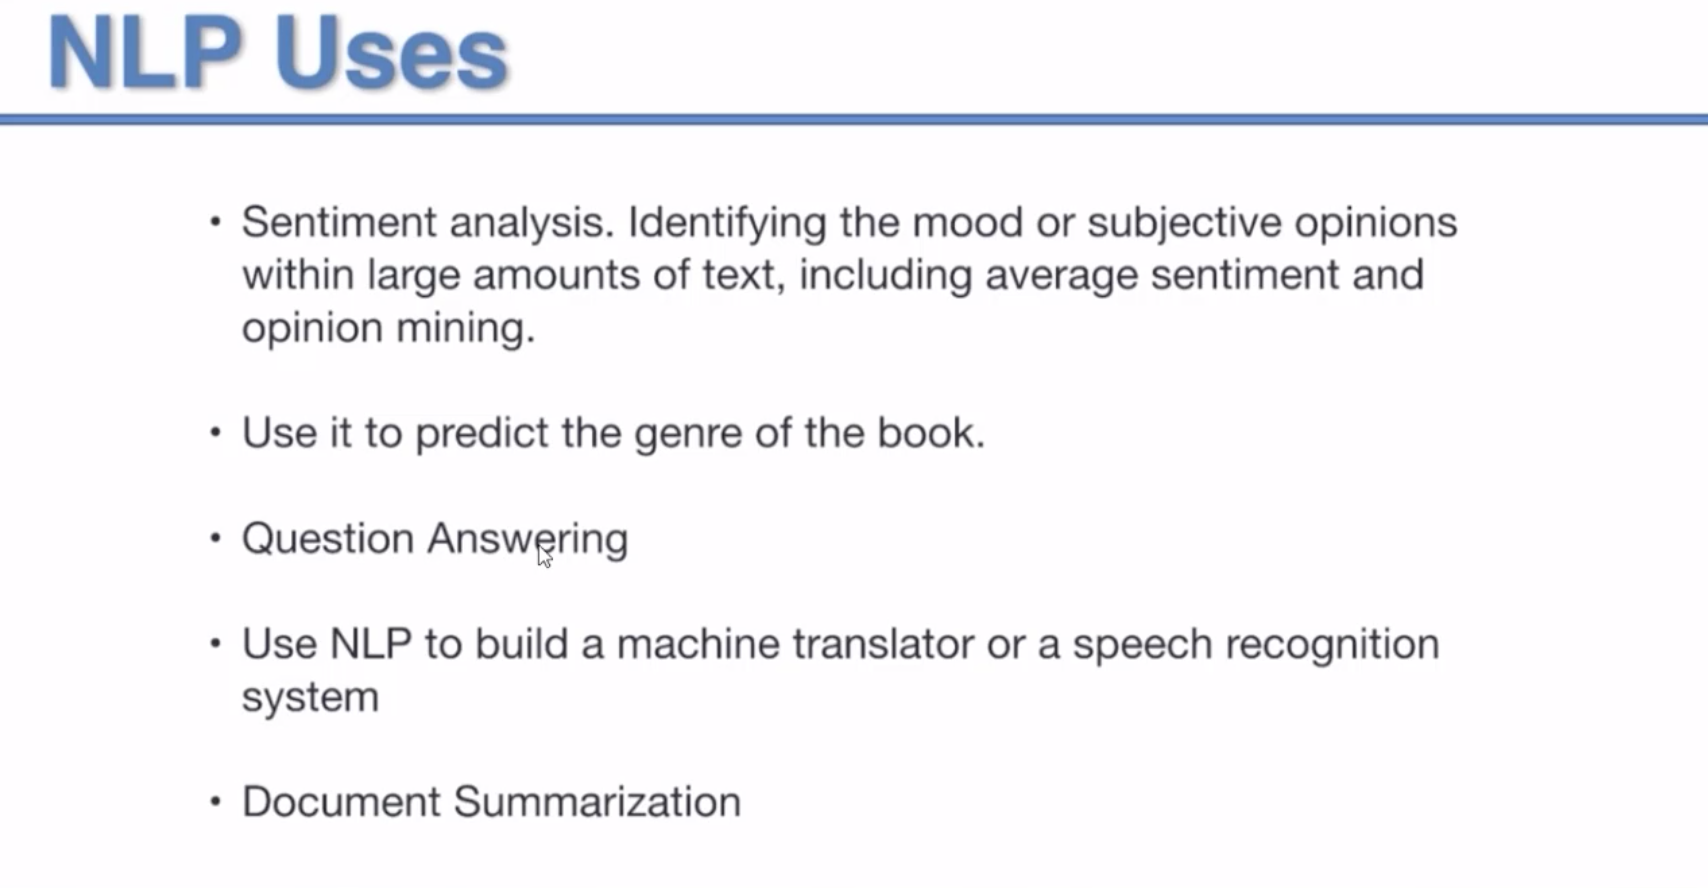

In [1]:
from IPython.display import Image
Image(filename='1.png')

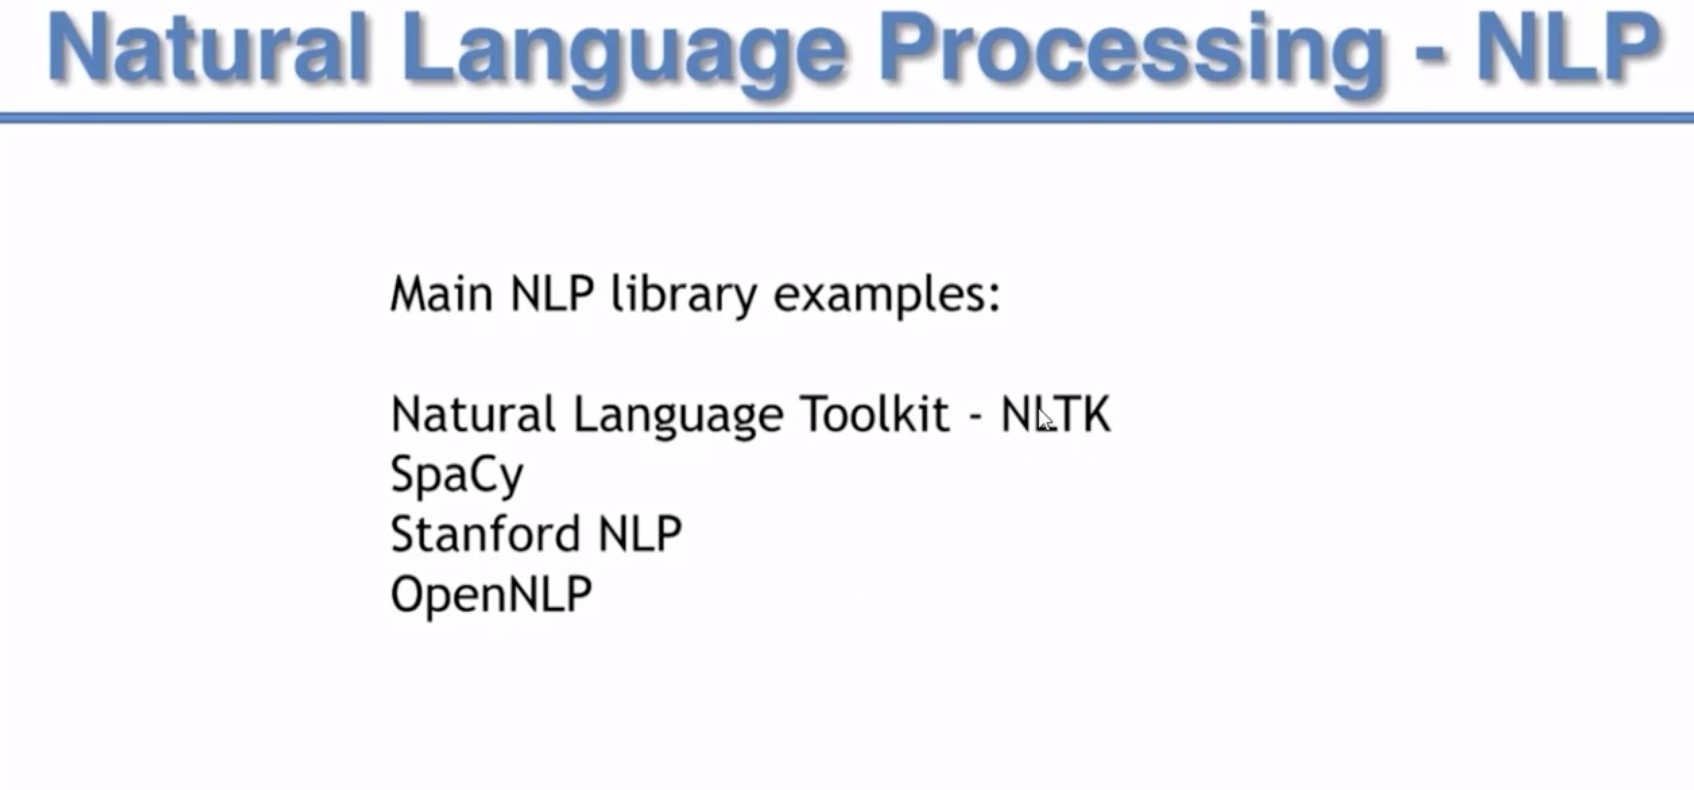

In [2]:
Image(filename='2.png')

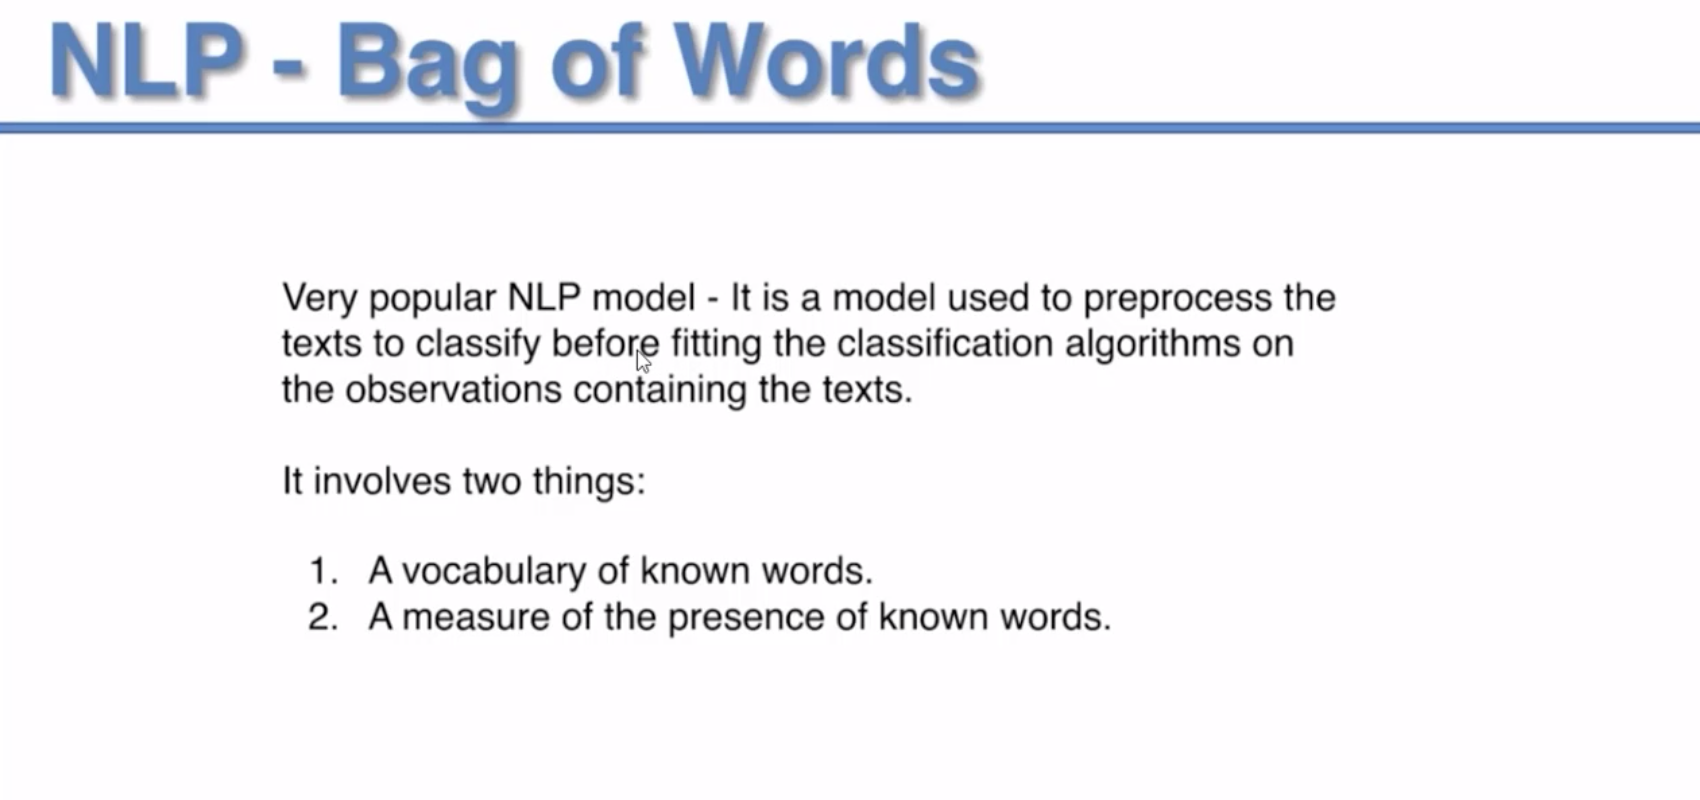

In [3]:
Image(filename='3.png')

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
# Importing the dataset
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter= '\t', quoting= 3)
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning the text

In [28]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [36]:
first_review = data['Review'][0]
print(first_review)

first_review = re.sub('[^a-zA-Z]', ' ', first_review) # ^ take from a-z
first_review = first_review.lower().split()
print(first_review)

ps = PorterStemmer()
first_review = set([ps.stem(word) for word in first_review if word not in stopwords.words('english')])
first_review = ' '.join(first_review)
print(first_review)



Wow... Loved this place.
['wow', 'loved', 'this', 'place']
wow place love


In [51]:
corpus = []
for sentence in data['Review']:
    sentence = re.sub('[^a-zA-Z]', ' ', sentence).lower().split()
    corpus.append(' '.join([ps.stem(word) for word in sentence if word not in stopwords.words('english')]))

corpus

'''
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
len(corpus)
'''

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

## Creating the Bag of Words model


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

## Splitting the dataset into the Training set and Test set


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Making a lot of Classification models 
## Fitting `Logistic Regression`

In [81]:
from sklearn.metrics import confusion_matrix

In [112]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression().fit(X_train, y_train)
y_pred_LR = classifier_LR.predict(X_test)
cm_LR = confusion_matrix(y_test, y_pred_LR)
print('Logistic Regression Accuracy = {}%'.format( ((cm_LR[0,0]+cm_LR[1,1])/ cm_LR.sum()) *100))


Logistic Regression Accuracy = 71.0%


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Fitting`Decision_Tree_Classification`

In [113]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion='entropy' , random_state=0).fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)
cm_DT = confusion_matrix(y_test, y_pred_DT)
print('Decision Tree Accuracy = {}%'.format( ((cm_DT[0,0]+cm_DT[1,1])/ cm_DT.sum()) *100))


Decision Tree Accuracy = 68.0%


## Fitting `Random Forest Classifer`

In [114]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=0).fit(X_train, y_train)
y_pred_RF = classifier.predict(X_test)
cm_RF = confusion_matrix(y_test, y_pred_RF)
print('Random Forest Accuracy = {}%'.format( ((cm_RF[0,0]+cm_RF[1,1])/ cm_RF.sum()) *100))


Random Forest Accuracy = 72.0%


## Fitting `K-Nearest Neighbors (K-NN)`


In [117]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
y_pred_KNN = classifier_KNN.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print('KNN Accuracy = {}%'.format( ((cm_KNN[0,0]+cm_KNN[1,1])/ cm_KNN.sum()) *100))



KNN Accuracy = 61.0%


## Fitting `Naive Bayes`

In [119]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB().fit(X_train, y_train)
y_pred_NB= classifier_NB.predict(X_test)
cm_NB= confusion_matrix(y_test, y_pred_NB)
print('Naive Bayes Accuracy = {}%'.format( ((cm_NB[0,0]+cm_NB[1,1])/ cm_NB.sum()) *100))


Naive Bayes Accuracy = 73.0%


## Fitting `SVM`
### 1- `SVM Linear Kernal`

In [120]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel='linear', random_state=0).fit(X_train, y_train)
y_pred_SVM = classifier_SVC.predict(X_test)
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print('SVM Accuracy = {}%'.format( ((cm_SVM[0,0]+cm_SVM[1,1])/ cm_SVM.sum()) *100))


SVM Accuracy = 72.0%


### 2- `SVM Gaussian rbf Kernal`

In [122]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel='rbf', random_state=0).fit(X_train, y_train)
y_pred_SVM = classifier_SVC.predict(X_test)
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print('SVM Accuracy = {}%'.format( ((cm_SVM[0,0]+cm_SVM[1,1])/ cm_SVM.sum()) *100))


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Accuracy = 48.5%


### 3- `SVM Poly Kernal`

In [124]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel='poly', random_state=0).fit(X_train, y_train)
y_pred_SVM = classifier_SVC.predict(X_test)
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print('SVM Accuracy = {}%'.format( ((cm_SVM[0,0]+cm_SVM[1,1])/ cm_SVM.sum()) *100))


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Accuracy = 48.5%


### 3- `SVM Sigmoid Kernal`

In [125]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel='sigmoid', random_state=0).fit(X_train, y_train)
y_pred_SVM = classifier_SVC.predict(X_test)
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print('SVM Accuracy = {}%'.format( ((cm_SVM[0,0]+cm_SVM[1,1])/ cm_SVM.sum()) *100))


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Accuracy = 48.5%


# As we sow the best fit modle is `Naive Bayes` with Accuracy = `73%`